# Введение в искусственные нейронные сети
# Урок 4. Сверточные нейронные сети

## Пример создания сверточных и пуллинг слоев на Keras

In [58]:
"""import numpy as np

import tensorflow as tf
#from tensorflow import keras
import tensorflow.keras as keras

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Concatenate 

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model 

from tensorflow.keras.datasets import fashion_mnist"""


'import numpy as np\n\nimport tensorflow as tf\n#from tensorflow import keras\nimport tensorflow.keras as keras\n\nfrom tensorflow.keras.models import Sequential, Model\nfrom tensorflow.keras import models, layers\nfrom tensorflow.keras.layers import Conv2D, Input\nfrom tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D\nfrom tensorflow.keras.layers import Dense, Flatten, Concatenate \n\nfrom tensorflow.keras.utils import to_categorical\nfrom tensorflow.keras.utils import plot_model \n\nfrom tensorflow.keras.datasets import fashion_mnist'

In [59]:
#y_pred=model.predict(x_test)

In [60]:
#model1.summary()



## **Сложные конструкции из простых слоев**

Слой для объединения

https://keras.io/api/layers/merging_layers/concatenate/

## Пример на Keras более сложной сверточной нейронной сети

Давайте теперь попробуем сделать несколько усложненный вариант нейронной сети разобранной ранее. В ней будет на несколько слоев больше и в ней будет использоваться data augumentation, процедура позволяющая за счет искажений изображений увеличить количество тренировочных данных, а как мы знаем чем больше тренировочных данных тем лучше будет работать нейросеть. Для обучения нейросети будем использовать датасет cifar-10. В нем 10 категорий объектов, например - лошадь, лягушка, корабль. Данный датасет уже более сложен для нейронных сетей чем mnist, однако он намного проще датасетов наподобие imagenet где используются сотни классов и архитектуры нейронных сетей для подобных датасетов также понадобяться более сложные.

In [61]:
from __future__ import print_function
import tensorflow.keras as keras # расскоментируйте эту строку, чтобы начать обучение
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt

import os

In [62]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [63]:


# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 1
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [64]:
data_augmentation = False

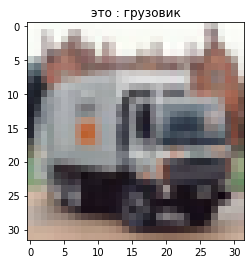

In [65]:
N = 11

plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()

In [66]:
"""# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])



if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=-1)

# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])"""

"# конфигурирование слоев нейросети\nmodel = Sequential()\n\n# слои нейросети отвественные за свертку и max-pooling\nmodel.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))\nmodel.add(Activation('relu'))\nmodel.add(Conv2D(32, (3, 3)))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout( 0.25))\n\nmodel.add(Conv2D(64, (3, 3), padding='same'))\nmodel.add(Activation('relu'))\nmodel.add(Conv2D(64, (3, 3)))\nmodel.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\n\n# полносвязные слои нейронной сети\nmodel.add(Flatten())\nmodel.add(Dense(512))\nmodel.add(Activation('relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(num_classes))\nmodel.add(Activation('softmax'))\n\n# инициализация RMSprop optimizer\n#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)\n\n# компиляция модели\nmodel.compile(loss='categorical_crossentropy',\n              optimizer='SGD',\n              metric

In [67]:
num_conv_lauers_list = [0, 1 ,2]
num_cores_list = [(2,2), (2,3), (3,3), (3,4), (4,4)]

In [68]:
import itertools

params_list = list(itertools.product(num_conv_lauers_list, num_cores_list))
params_list[:]

[(0, (2, 2)),
 (0, (2, 3)),
 (0, (3, 3)),
 (0, (3, 4)),
 (0, (4, 4)),
 (1, (2, 2)),
 (1, (2, 3)),
 (1, (3, 3)),
 (1, (3, 4)),
 (1, (4, 4)),
 (2, (2, 2)),
 (2, (2, 3)),
 (2, (3, 3)),
 (2, (3, 4)),
 (2, (4, 4))]

In [69]:
rez_list = []

In [70]:
def get_num_layers(num_layer = None , num_cores = None):
  model = Sequential()
  model.add(Conv2D(32, num_cores, padding='same', input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, num_cores))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout( 0.25))
  #Изменяемое количество слоев
  for _n in range(num_layer):
    model.add(Conv2D(64, num_cores, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, num_cores))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

  # полносвязные слои нейронной сети
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  # инициализация RMSprop optimizer
  #opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

  # компиляция модели
  model.compile(loss='categorical_crossentropy',
                optimizer='SGD',
                metrics=['accuracy'])
  return model

In [ ]:
model2 = get_num_layers(2, (2,2))
model2.summary()

In [72]:
for i in range(len(params_list)):
  row_rez_list = []
  row_rez_list.append(params_list[i][0])
  print(params_list[i][0])
  row_rez_list.append(params_list[i][1])
  print(params_list[i][1])
  ### Модель начало
  model = get_num_layers(num_layer = params_list[i][0] , num_cores = params_list[i][1])

  datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False, 
    zca_epsilon=1e-06, 
    rotation_range=5, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0., 
    zoom_range=0., 
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
  model.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                      epochs=epochs,
                      validation_data=(x_test, y_test),
                      workers=-1)

# проверка работы обученной модели
  scores = model.evaluate(x_test, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])
  row_rez_list.append(scores[0])
  row_rez_list.append(scores[1])
  ### Модель конец

  rez_list.append(row_rez_list)
print(rez_list)


0
(2, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


313/313 [==============================] - 7s 22ms/step - loss: 1.7274 - accuracy: 0.3950
Test loss: 1.7274270057678223
Test accuracy: 0.39500001072883606
0
(2, 3)
313/313 [==============================] - 7s 23ms/step - loss: 1.7284 - accuracy: 0.3900
Test loss: 1.728371262550354
Test accuracy: 0.38999998569488525
0
(3, 3)
313/313 [==============================] - 9s 27ms/step - loss: 1.6811 - accuracy: 0.4125
Test loss: 1.6811002492904663
Test accuracy: 0.4124999940395355
0
(3, 4)
313/313 [==============================] - 10s 31ms/step - loss: 1.6332 - accuracy: 0.4233
Test loss: 1.63321053981781
Test accuracy: 0.42329999804496765
0
(4, 4)
313/313 [==============================] - 11s 34ms/step - loss: 1.6492 - accuracy: 0.4216
Test loss: 1.6491738557815552
Test accuracy: 0.42160001397132874
1
(2, 2)
313/313 [==============================] - 8s 26ms/step - loss: 1.9219 - accuracy: 0.3194
Test loss: 1.9218719005584717
Test accuracy: 0.31940001249313354
1
(2, 3)
313/313 [=========

In [73]:
import pandas as pd

In [75]:
columns_params = ['num_layers', 'num_cores','loss','acuracy']
df_rez = pd.DataFrame(rez_list, columns = columns_params)
df_rez

,num_layers,num_cores,loss,acuracy
0,0,"(2, 2)",1.727427,0.3950
1,0,"(2, 3)",1.728371,0.3900
2,0,"(3, 3)",1.681100,0.4125
3,0,"(3, 4)",1.633211,0.4233
4,0,"(4, 4)",1.649174,0.4216
5,1,"(2, 2)",1.921872,0.3194
6,1,"(2, 3)",1.942386,0.3052
7,1,"(3, 3)",1.948181,0.3149
8,1,"(3, 4)",1.955455,0.2901
9,1,"(4, 4)",1.828049,0.3470


1.Увеличение ширины сети ведет к повышению точности <br>
2.Увеличение глубины сети ведет к уменьшению точности